# Frequency domain of Granger causality (Geweke-Granger causality)
Note that this is an example that is provided in <a href='https://arxiv.org/abs/q-bio/0608035'>this</a> paper. It is an exercise for the author to get the idea on what is spectral granger causality. Reader is advice to read the text to get the idea about the equation. 

Given the equation of the autoregressive model is: 

$X_t = 0.9 X_{t-1} - 0.5 X_{t-2} + \epsilon_{t}$

$Y_t = 0.16 X_{t-1} - 0.2 X_{t-2} + 0.8 Y_{t-1} - 0.5 Y_{t-2} + \eta_t$ 

Such that $\epsilon_t$ and $\eta_t$ are the Gaussian white noise with <b>ZERO means</b> and have the covariance matrix, $\boldsymbol{\Sigma} = \begin{bmatrix} \Sigma_2 & \gamma_2 \\ \gamma_2 & \Gamma_2 \end{bmatrix} = \begin{bmatrix} 1 & 0.4 \\ 0.4 & 0.7 \end{bmatrix}$

In the following code, the (power) spectrum for $X$ and $Y$ will be computed. Concurrently, the [interdependence ($f_{X, Y}$)], [directional causalities ($f_{X \rightarrow Y}$ and $f_{Y \rightarrow X}$)], and [instantaneous causality ($f_{X \cdot Y}$)] will be computed. Finally, the [total causality] is computed and showed that the result is the same as [interdependence] as it should. 

First the, coefficient matrix is computed $\boldsymbol{A(\omega)} = \begin{bmatrix} 1 - \sum^{\infty}_{j=1} a_{2j} e^{-i\omega j} & -\sum^{\infty}_{j=1} b_{2j} e^{-i \omega j} \\ -\sum^{\infty}_{j=1} c_{2j} e^{-i \omega j} & 1 - \sum^{\infty}_{j=1} d_{2j} e^{-i \omega j} \end{bmatrix}$. 

Using the coefficeint matrix $\boldsymbol{A(\omega)}$, the transfer function can be determined as the transfer function, $\boldsymbol{H(\omega)} = \boldsymbol{A^{-1}(\omega)}$. 

Next the spectral matrix is calculated using the following expression: $\boldsymbol{S(\omega) = H(\omega) \Sigma H^*(\omega)}$, $\boldsymbol{H^*(\omega)}$ is the conjugate transpose matrix. 

Spectrum of X and Y are $S_{xx}(\omega)$ and $S_{yy}(\omega)$, respectively. 

Interdependence, $f_{X, Y} = \ln{\frac{S_{xx}(\omega) S_{yy}(\omega)}{\left| \boldsymbol{S(\omega)} \right|}}$

Spectrum causality of $Y$ to $X$, $f_{Y \rightarrow X} = \ln{\frac{S_{xx}(\omega)}{\tilde{H}_{xx}(\omega) \Sigma_2 \tilde{H}^*_{xx}(\omega)}} , \tilde{H}_{xx}(\omega) = H_{xx}(\omega) + \frac{\gamma_2}{\Sigma_2} H_{xy}(\omega)$

Spectrum causality of $X$ to $Y$, $f_{X \rightarrow Y} = \ln{\frac{S_{yy}(\omega)}{\hat{H}_{yy}(\omega) \Gamma_2 \hat{H}^*_{yy}(\omega)}} , \hat{H}_{yy}(\omega) = H_{yy}(\omega) + \frac{\gamma_2}{\Gamma_2} H_{yx}(\omega)$

Spectrum of instantaneous causality for $X$ and $Y$, $f_{X \cdot Y} = \ln{\frac{\left( \tilde{H}_{xx}(\omega) \Sigma_2 \tilde{H}^*_{xx}(\omega) \right) \left( \hat{H}_{yy}(\omega) \Gamma_2 \hat{H}^*_{yy}(\omega) \right)}{\left| \boldsymbol{S(\omega)} \right|}}$

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

#covariance matrix
sigma11 = 1.0
sigma12 = 0.4
sigma21 = sigma12 
sigma22 = 0.7
matCov = np.array([[sigma11, sigma12],[sigma21, sigma22]])

const = 2j*np.pi
point = 200
x = np.linspace(0, point, point)
x1 = abs(x)
spectx = []
specty = []
spectxy = []
spectyx = []
anscoh = []
inter = []
anscyx = []
anscxy = []
ansinst = []

for i in x: 
    #matrix A
    #i=1/i
    a = 1 - 0.9*np.exp(-i*const) + 0.5*np.exp(-2*i*const)
    b = 0 
    c = -0.16*np.exp(-i*const) + 0.2*np.exp(-2*i*const)
    d = 1 - 0.8*np.exp(-i*const) + 0.5*np.exp(-2*i*const)
    
    matA = np.array([[a, b],[c, d]])
    detA = np.linalg.det(matA)
    
    #matrix H
    hxx = d/detA
    hxy = -b/detA
    hyx = -c/detA
    hyy = a/detA
    
    matH = np.array([[hxx, hxy],[hyx, hyy]])
    matHs = np.transpose(np.array([[np.conj(hxx), np.conj(hxy)],[np.conj(hyx), np.conj(hyy)]]))
    
    s = np.dot(np.dot(matH, matCov), matHs) #spectrum matrix 
    
    spectx.append(s[0][0])
    specty.append(s[1][1])
    spectxy.append(s[0][1])
    spectyx.append(s[1][0])
    
    #coherence equation 17
    coh = (s[0][1]*s[1][0])/(s[0][0]*s[1][1])
    lol = -np.log(1-coh)
    anscoh.append(coh)
    
    #interdependence
    f = np.log((s[0][0]*s[1][1])/(np.linalg.det(s)))
    inter.append(f)
    
    #causal y to x
    dhxx = hxx + sigma12/sigma11*hxy
    dhxy = hxy 
    dhyx = hyx + sigma12/sigma11*hyy
    dhyy = hyy 
    cyx = np.log((s[0][0])/(dhxx*sigma11*np.conj(dhxx)))
    anscyx.append(cyx)
    
    #causal x to y 
    hhyy = hyy + sigma12/sigma22*hyx
    cxy = np.log((s[1][1])/(hhyy*sigma22*np.conj(hhyy)))
    anscxy.append(cxy)
    
    #instantaneous causal of x and y
    inst_cau = np.log(((dhxx*sigma11*np.conj(dhxx))*(hhyy*sigma22*np.conj(hhyy)))/(np.linalg.det(s)))
    ansinst.append(inst_cau)

# Plotting the result

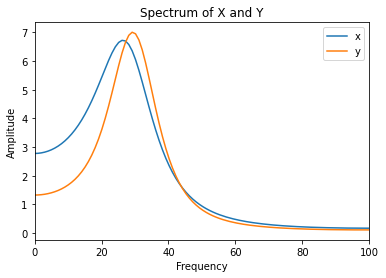

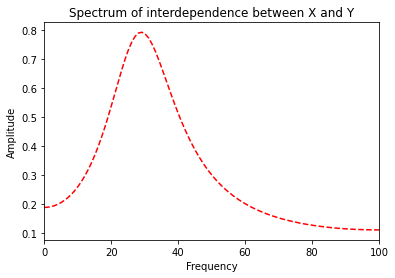

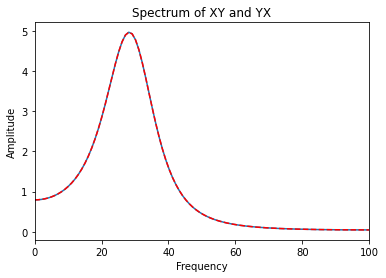

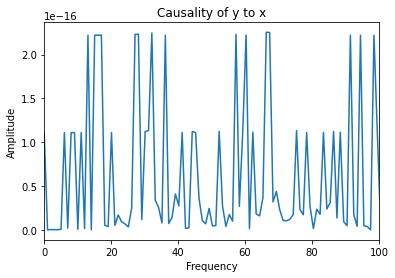

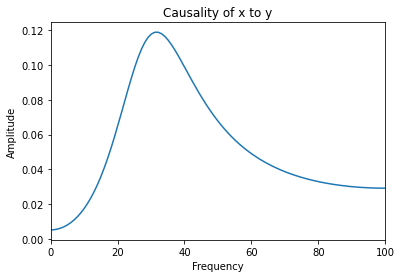

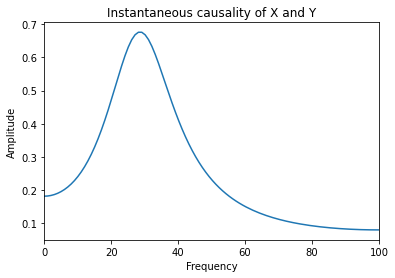

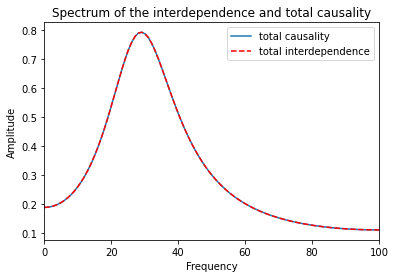

In [12]:
plt.figure()
plt.plot(x, abs(np.array(spectx)), label='x')
plt.plot(x, abs(np.array(specty)), label='y')
plt.legend(loc='best')
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Spectrum of X and Y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
#plt.plot(x, abs(np.array(anscoh)), label='coherence')
plt.plot(x, abs(np.array(inter)), 'r--', label='total interdependence')
#plt.legend(loc='best')
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Spectrum of interdependence between X and Y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(x, abs(np.array(spectxy)))
plt.plot(x, abs(np.array(spectyx)), 'r--')
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Spectrum of XY and YX')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(x, abs(np.array(anscyx)))
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Causality of y to x')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(x, abs(np.array(anscxy)))
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Causality of x to y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(x, abs(np.array(ansinst)))
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Instantaneous causality of X and Y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(x, abs(np.array(anscyx)+np.array(anscxy)+np.array(ansinst)), label='total causality')
plt.plot(x, abs(np.array(inter)), 'r--', label='total interdependence')
plt.legend(loc='best')
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Spectrum of the interdependence and total causality')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()